In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar datasets
df_canasta = pd.read_csv('../data/canasta_basica.csv', parse_dates=['fecha'])
df_salario = pd.read_csv('../data/salario_minimo.csv', parse_dates=['fecha'])
df_ipc = pd.read_csv('../data/indices_inflacion.csv', parse_dates=['fecha'])

# Verificar primeras filas
display(df_canasta.head())
display(df_salario.head())
display(df_ipc.head())

,fecha,cba,cbt
0,2016-01-01,1430.06,1787.58
1,2016-02-01,2868.92,3586.15
2,2016-03-01,4553.40,5691.74
3,2016-04-01,5897.46,7371.82
4,2016-05-01,6100.74,7625.93


,fecha,smvm
0,2016-01-01,7286.40
1,2016-02-01,9737.25
2,2016-03-01,11310.70
3,2016-04-01,15205.30
4,2016-05-01,16816.11


,fecha,ipc_general,alimentos,transporte,salud,educacion,vivienda
0,2016-01-01,95.58,100.743396,92.109600,105.143104,92.709963,93.499876
1,2016-02-01,123.37,123.108398,120.164326,117.295988,118.773544,131.078272
2,2016-03-01,113.78,109.281911,126.315036,105.880214,113.279998,110.728967
3,2016-04-01,123.17,123.125171,132.527621,119.440979,124.751806,117.575421
4,2016-05-01,118.94,123.288443,128.033446,104.430439,122.864158,122.782709


In [5]:
# Unir datasets por 'fecha'
df = df_canasta.merge(df_salario, on='fecha').merge(df_ipc, on='fecha')

# Verificar dimensiones y columnas
print(f"Filas: {len(df)}")
print("Columnas:", df.columns.tolist())
df.head()

Filas: 115
Columnas: ['fecha', 'cba', 'cbt', 'smvm', 'ipc_general', 'alimentos', 'transporte', 'salud', 'educacion', 'vivienda']


,fecha,cba,cbt,smvm,ipc_general,alimentos,transporte,salud,educacion,vivienda
0,2016-01-01,1430.06,1787.58,7286.40,95.58,100.743396,92.109600,105.143104,92.709963,93.499876
1,2016-02-01,2868.92,3586.15,9737.25,123.37,123.108398,120.164326,117.295988,118.773544,131.078272
2,2016-03-01,4553.40,5691.74,11310.70,113.78,109.281911,126.315036,105.880214,113.279998,110.728967
3,2016-04-01,5897.46,7371.82,15205.30,123.17,123.125171,132.527621,119.440979,124.751806,117.575421
4,2016-05-01,6100.74,7625.93,16816.11,118.94,123.288443,128.033446,104.430439,122.864158,122.782709


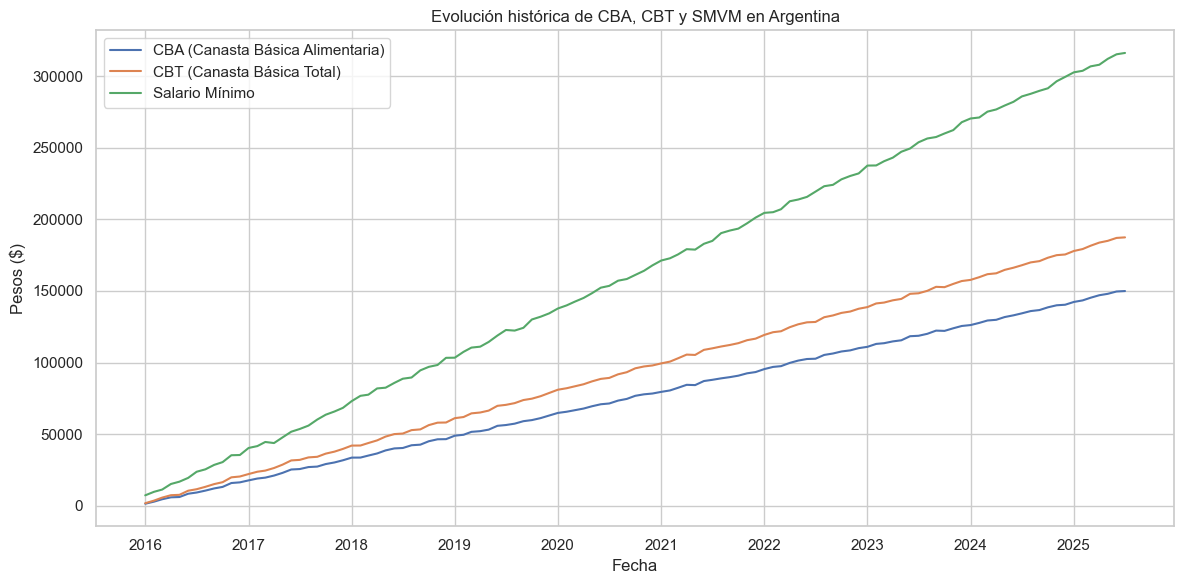

In [6]:
plt.plot(df['fecha'], df['cba'], label='CBA (Canasta Básica Alimentaria)')
plt.plot(df['fecha'], df['cbt'], label='CBT (Canasta Básica Total)')
plt.plot(df['fecha'], df['smvm'], label='Salario Mínimo')
plt.title('Evolución histórica de CBA, CBT y SMVM en Argentina')
plt.xlabel('Fecha')
plt.ylabel('Pesos ($)')
plt.legend()
plt.tight_layout()
plt.show()

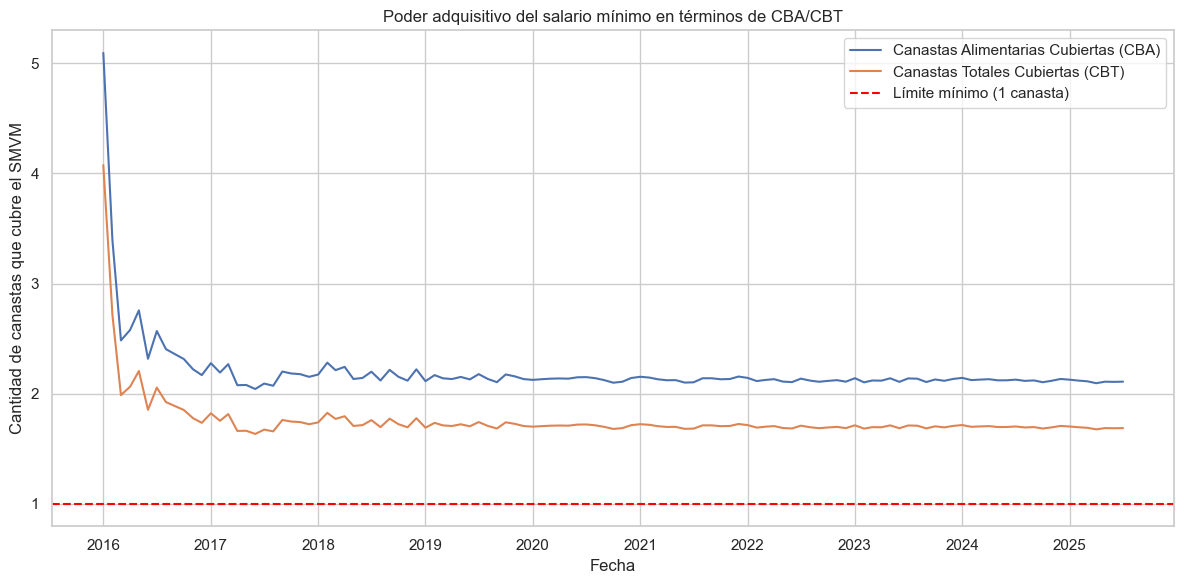

In [7]:
df['cba_cubierta'] = df['smvm'] / df['cba']
df['cbt_cubierta'] = df['smvm'] / df['cbt']

plt.plot(df['fecha'], df['cba_cubierta'], label='Canastas Alimentarias Cubiertas (CBA)')
plt.plot(df['fecha'], df['cbt_cubierta'], label='Canastas Totales Cubiertas (CBT)')
plt.axhline(1, color='red', linestyle='--', label='Límite mínimo (1 canasta)')
plt.title('Poder adquisitivo del salario mínimo en términos de CBA/CBT')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de canastas que cubre el SMVM')
plt.legend()
plt.tight_layout()
plt.show()